# Climatology plots for different variables
### Created by Marisol, 6 June 2022

In [17]:
import warnings 
warnings.simplefilter('ignore') 

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import fsspec # these libraries help reading cloud data
import s3fs
import dask
from dask.distributed import performance_report, Client, progress
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [27]:
lat1, lat2 = 17, 20 
lon1, lon2 = -89,-86.5

In [74]:
def plot_seas(dsa, tit, vm, vx):
    fig=plt.figure(figsize=(5,3),dpi=150)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lon1,lon2,lat1,lat2],crs=ccrs.PlateCarree())
    ax.set_xticks([*range(int(lon1),int(lon2))], crs=ccrs.PlateCarree())
    ax.set_yticks([*range(int(lat1),int(lat2+1))], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, color='lightgrey')
    dsa.plot(cmap='jet', vmin=vm, vmax=vx)
    plt.plot(-87.71,18.72,'m*')
    plt.plot(-87.83,18.27,'m*')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(tit)
    plt.show()
    
def seas_clim(dsx, var, timevar, off=[0]):
    # seasons
    # secas: feb-may
    # lluvias: jun-sep
    # norte: oct-jan
    a = (dsx[timevar].dt.month>=2)&(dsx[timevar].dt.month<=5)
    secas = dsx[var][a].mean(dim={timevar},keep_attrs=True) + off
    a = (dsx[timevar].dt.month>=6)&(dsx[timevar].dt.month<=9)
    lluvias = dsx[var][a].mean(dim={timevar},keep_attrs=True) + off
    a = (dsx[timevar].dt.month==1)|(dsx[timevar].dt.month>=10)
    norte = dsx[var][a].mean(dim={timevar},keep_attrs=True) + off

    vm = np.min([secas.min().values,lluvias.min().values,norte.min().values])
    vx = np.max([secas.max().values,lluvias.max().values,norte.max().values])
    plot_seas(secas, 'Estacion Seca (Feb-May)', vm, vx)
    plot_seas(lluvias, 'Estacion Lluvias (Jun-Sep)', vm, vx)
    plot_seas(norte, 'Estacion Norte (Oct-Jan)', vm, vx)

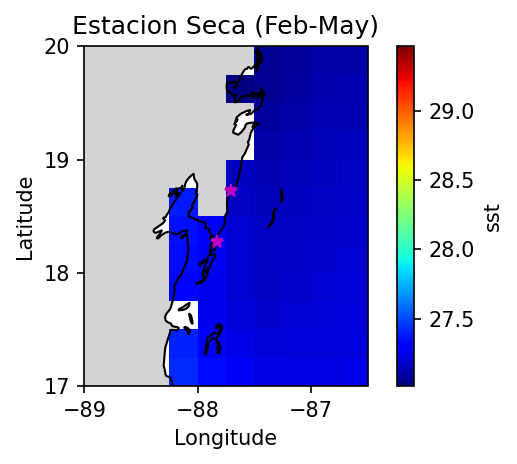

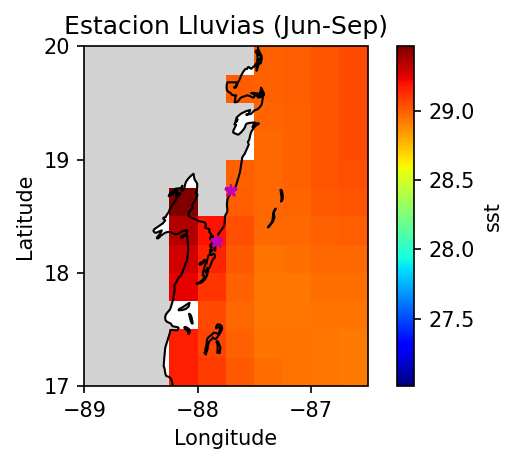

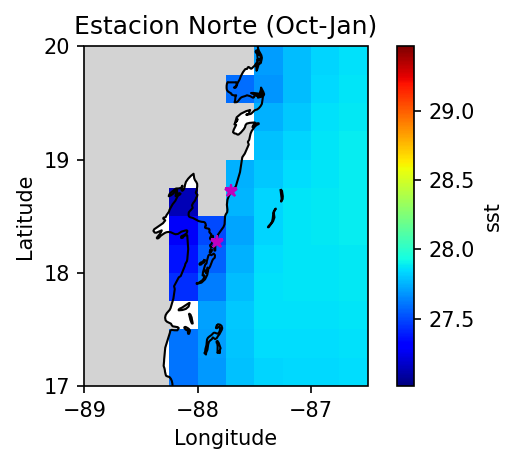

<xarray.Dataset>
Dimensions:  (time: 14337, lat: 12, lon: 10)
Coordinates:
  * time     (time) datetime64[ns] 1981-10-01 1981-10-02 ... 2020-12-31
  * lat      (lat) float32 17.12 17.38 17.62 17.88 ... 19.12 19.38 19.62 19.88
  * lon      (lon) float32 271.1 271.4 271.6 271.9 ... 272.6 272.9 273.1 273.4
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1188, 12, 10), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Sun Jun  5 22:12:50 2022: ncrcat -O -d lat,17.000000,20.0...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [75]:
# Low resolution SST

ds = xr.open_mfdataset('../data/OISST/*.nc')
ds.close()

seas_clim(ds,'sst','time')
ds

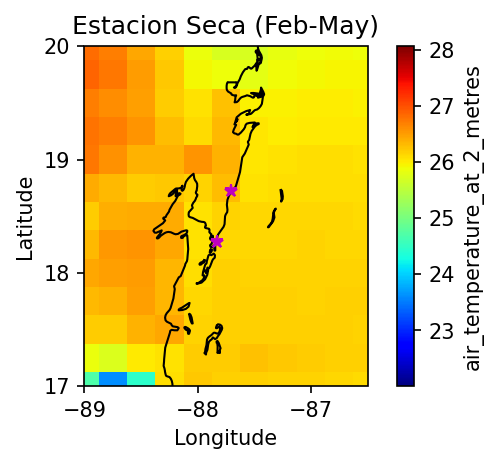

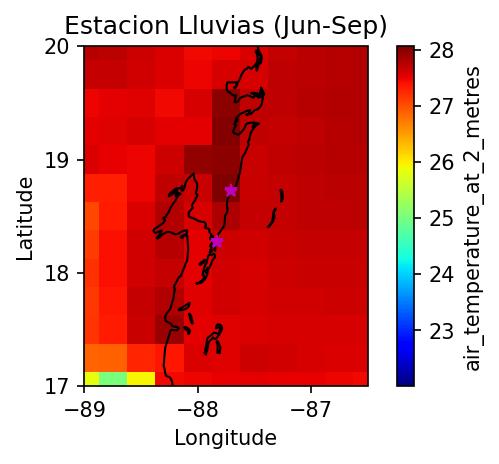

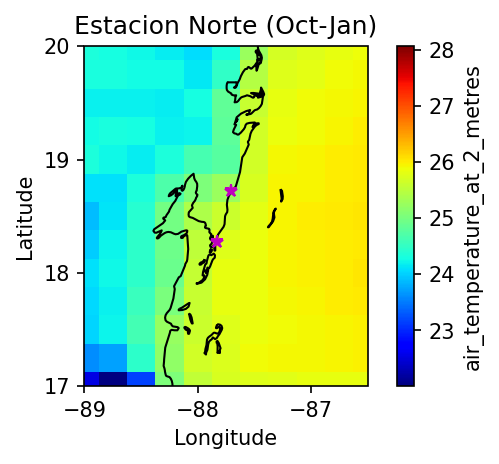

<xarray.Dataset>
Dimensions:                      (lat: 13, lon: 11, time0: 379824)
Coordinates:
  * lat                          (lat) float32 20.0 19.75 19.5 ... 17.25 17.0
  * lon                          (lon) float32 271.0 271.2 271.5 ... 273.2 273.5
  * time0                        (time0) datetime64[ns] 1979-01-01 ... 2022-0...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 dask.array<chunksize=(744, 13, 11), meta=np.ndarray>

In [76]:
# Air temp

ds = xr.open_mfdataset('../data/ERA5_AT2m/*.nc')
ds.close()

seas_clim(ds,'air_temperature_at_2_metres','time0',-273.15)
ds

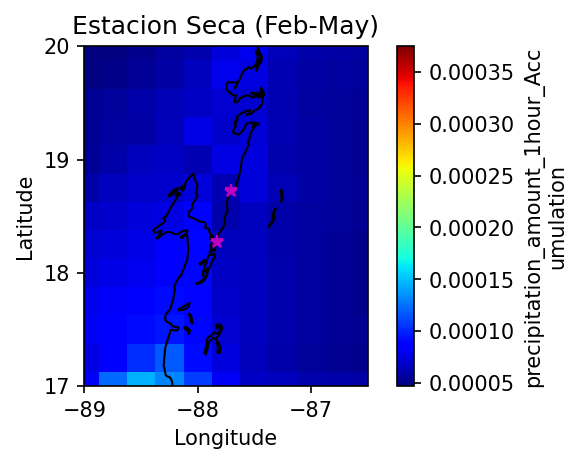

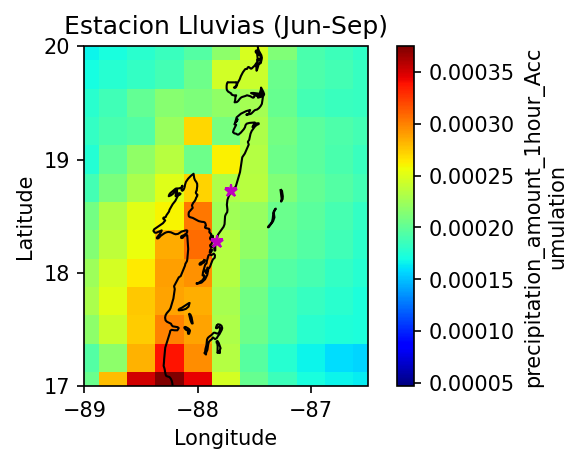

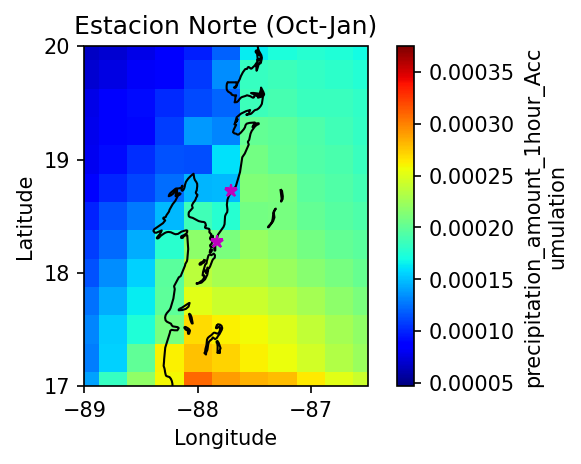

<xarray.Dataset>
Dimensions:                                  (lat: 13, lon: 11, time1: 379817)
Coordinates:
  * lat                                      (lat) float32 20.0 19.75 ... 17.0
  * lon                                      (lon) float32 271.0 271.2 ... 273.5
  * time1                                    (time1) datetime64[ns] 1979-01-0...
Data variables:
    precipitation_amount_1hour_Accumulation  (time1, lat, lon) float32 dask.array<chunksize=(737, 13, 11), meta=np.ndarray>

In [77]:
# Precipitation

ds = xr.open_mfdataset('../data/ERA5_Rain/*.nc')
ds.close()

seas_clim(ds,'precipitation_amount_1hour_Accumulation','time1')
ds